<a href="https://colab.research.google.com/github/feliciamargareta/Supervised-Learning-with-scikit-learn/blob/main/Customer_Churn_Prediction_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction with K Nearest Neighbors


In [1]:
# import libraries
import pandas as pd

In [87]:
# load data
churn_df = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Supervised-Learning-with-scikit-learn/main/telecom_churn_clean.csv')
churn_df.head(10)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


Based on the data above, let's predict the customer churn.

In [88]:
# create feature & target variable
X = churn_df.drop('churn', axis =1).values
X = X[:,1:]
y = churn_df['churn'].values

In [89]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )
# stratify is used to keep the proportion of population

In [90]:
# import KNN libraries
from sklearn.neighbors import KNeighborsClassifier

# Calculate the train & test accuracy
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,16)


for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)


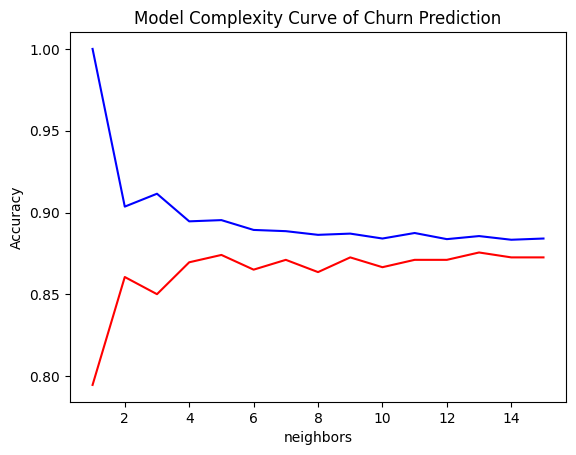

In [117]:
# plot the model complexity curve to find the optimal neighbors with the highest test accuracy
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
plt.plot(neighbors, train_accuracies.values(), color = 'b', label = 'Train Accuracies')
# ax.ylim(0, 1)
# ax2 = ax.twinx()
plt.plot(neighbors, test_accuracies.values(), color = 'r', label = 'Test Accuracies')
plt.title('Model Complexity Curve of Churn Prediction')
plt.xlabel('neighbors')
plt.ylabel('Accuracy')
plt.show()


In [92]:
test_accuracies

{1: 0.7946026986506747,
 2: 0.8605697151424287,
 3: 0.8500749625187406,
 4: 0.8695652173913043,
 5: 0.8740629685157422,
 6: 0.8650674662668666,
 7: 0.8710644677661169,
 8: 0.863568215892054,
 9: 0.8725637181409296,
 10: 0.8665667166416792,
 11: 0.8710644677661169,
 12: 0.8710644677661169,
 13: 0.8755622188905547,
 14: 0.8725637181409296,
 15: 0.8725637181409296}

In [93]:
# find the optimal neighbor with the highest test accuracy

# opt_neighbor = []
# for k, v in test_accuracies.items():
#   if v == max(test_accuracies.values()):
#     opt_neighbor = k

opt_neighbor = [k for k, v in test_accuracies.items() if v == max(test_accuracies.values())]
opt_neighbor

[13]

In [115]:
knn13 = KNeighborsClassifier(n_neighbors = opt_neighbor[0])
knn13.fit(X_train,y_train)
y_pred = knn13.predict(X_test)

test_accuracy = knn13.score(X_test, y_test)

print('The test accuracy by KNN with ', opt_neighbor[0], 'neighbors is ', test_accuracy)

The test accuracy by KNN with  13 neighbors is  0.8755622188905547


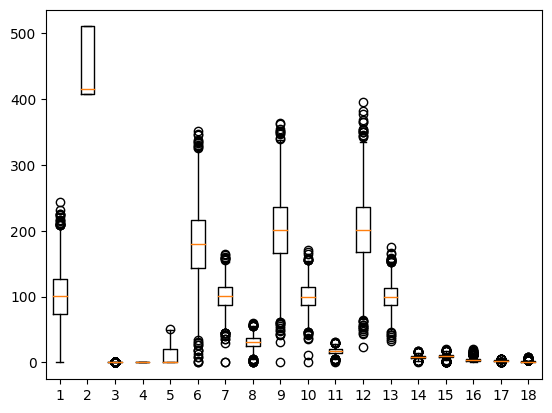

In [97]:
# plot the feature to see the data range and distribution
plt.boxplot(X)
plt.show()

In [98]:
# do the data preprocessing to improve the accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

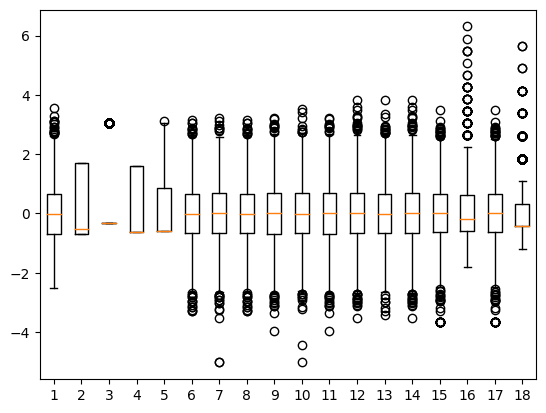

In [100]:
# plot the scaled feature to see the changes
plt.boxplot(scaled_X)
plt.show()

In [101]:
# predict using the scaled X
X_train1, X_test1, y_train1, y_test1=train_test_split(scaled_X, y , test_size = 0.2, random_state = 42, stratify = y)

# Calculate the train & test accuracy
train_accuracies1 = {}
test_accuracies1 = {}
neighbors = range(1,16)


for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train1, y_train1)
  train_accuracies1[neighbor] = knn.score(X_train1, y_train1)
  test_accuracies1[neighbor] = knn.score(X_test1, y_test1)


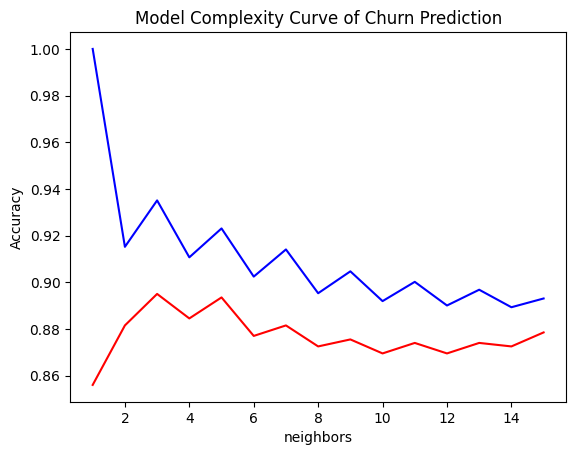

In [107]:
# plot the model complexity curve to find the optimal neighbors with the highest test accuracy
# import matplotlib.pyplot as plt
# fig, ax2 = plt.subplots()
plt.plot(neighbors, train_accuracies1.values(), color = 'b', label = 'Train Accuracies')
# ax.ylim(0, 1)
# ax2 = ax.twinx()
plt.plot(neighbors, test_accuracies1.values(), color = 'r', label = 'Test Accuracies')
plt.title('Model Complexity Curve of Churn Prediction')
plt.xlabel('neighbors')
plt.ylabel('Accuracy')
plt.show()


In [116]:
optimal_neighbor = []
for k, v in test_accuracies1.items():
  if v== max(test_accuracies1.values()):
    optimal_neighbor = k

print('The optimal neighbor is ',optimal_neighbor, ' neighbors, with test accuracy of ',max(test_accuracies1.values()))

The optimal neighbor is  3  neighbors, with test accuracy of  0.8950524737631185


Before scaling the feature, our KNN prediction with 13 neighbors have the accuracy of 87.56%. After scaling the feature, the optimal neighbors becomes only 3 and even though we have better accuracy of 89.5%, it's better for us to still choose the first model without scaling the feature to avoid the model becomes too complex and resulting an over fitting.